In [1]:
import ds_loader as dsl
import numpy
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import make_grid
from torchvision.models.mobilenet import mobilenet_v2


In [2]:
class Config():
    batch_size = 32
    epochs = 50
    learn_rate = 0.001
    CLASSES = 55
    #weight_decay = 0.001

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
train_dl = dsl.get_dataloader(is_train=True, batch_size=Config.batch_size)

test_dl = dsl.get_dataloader(is_train=False, batch_size=Config.batch_size)

In [5]:
#define mode
model = mobilenet_v2(pretrained=True)

model.features[0][0] = nn.Conv2d(9, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
model.classifier[1] = nn.Linear(in_features=model.classifier[1].in_features, out_features=Config.CLASSES)

model.to(device)

# define optimizer
#optimizer = torch.optim.Adam(model.parameters(), lr=Config.learn_rate, weight_decay=Config.weight_decay)
optimizer = torch.optim.Adam(model.parameters(), lr=Config.learn_rate)
# define loss function
loss_function = nn.CrossEntropyLoss()

next(model.parameters()).is_cuda

True

===> Epoch: 0 loss: 4.2003
===> Epoch: 1 loss: 3.0266
===> Epoch: 2 loss: 2.0269
===> Epoch: 3 loss: 2.3183
===> Epoch: 4 loss: 2.7547
===> Epoch: 5 loss: 1.8804
===> Epoch: 6 loss: 2.1304
===> Epoch: 7 loss: 1.7035
===> Epoch: 8 loss: 1.2217
===> Epoch: 9 loss: 1.7896
===> Epoch: 10 loss: 0.7249
===> Epoch: 11 loss: 1.5202
===> Epoch: 12 loss: 0.4744
===> Epoch: 13 loss: 0.9384
===> Epoch: 14 loss: 1.3802
===> Epoch: 15 loss: 0.9319
===> Epoch: 16 loss: 1.0466
===> Epoch: 17 loss: 1.0039
===> Epoch: 18 loss: 0.9721
===> Epoch: 19 loss: 0.6356
===> Epoch: 20 loss: 0.6128
===> Epoch: 21 loss: 0.7630
===> Epoch: 22 loss: 0.8892
===> Epoch: 23 loss: 1.2703
===> Epoch: 24 loss: 0.4772
===> Epoch: 25 loss: 0.7521
===> Epoch: 26 loss: 0.7223
===> Epoch: 27 loss: 0.7205
===> Epoch: 28 loss: 0.6972
===> Epoch: 29 loss: 0.0880
===> Epoch: 30 loss: 0.7227
===> Epoch: 31 loss: 0.4268
===> Epoch: 32 loss: 0.4447
===> Epoch: 33 loss: 0.4313
===> Epoch: 34 loss: 1.1211
===> Epoch: 35 loss: 1.2005
==

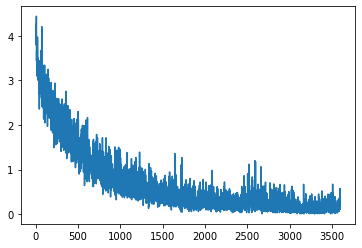

In [6]:
loss_ls_train = []
model.train()

for epoch in range(Config.epochs):
    for data, labels in train_dl:
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()
        data = data.permute(0, 3, 1, 2)

        prediction = model(data)

        loss = loss_function(prediction, labels)
        loss.backward()
        optimizer.step()

        loss_ls_train.append(loss.data.item())

    print('===> Epoch: {} loss: {:.4f}'.format(epoch, loss.data.item()))

plt.plot(loss_ls_train)
plt.show()

In [7]:
# Start Evaluation
model.eval()
correct_pred = 0
num_pred = 0

for data, label in test_dl:
    data, label = data.to(device), label.to(device)

    data = data.permute(0, 3, 1, 2)
    pred = torch.argmax(model(data), dim=1)

    num_pred += len(label)
    correct_pred = correct_pred + torch.eq(pred,label).sum().data.item()

print('Number of correct predictions: ' + str(correct_pred))
print('Number of Predictions:' + str(num_pred))
print('Portion: ' + str(correct_pred/num_pred))

Number of correct predictions: 79
Number of Predictions:2288
Portion: 0.034527972027972025
